# Минимальная охватывающая окружность (вероятностный алгоритм)

В этом билете мы рассмотрим задачу о нахождении минимальной охватывающей окружности множества(smallest enclosing disc). Это задача, в которой необходимо по заданному набору точек найти окружность минимального радиуса, которая содержит все точки множества.

**Лемма 1.** Определим $P_i =${$p_1,...,p_i$}, а $D_i$ - мин. охват. окружность для $P_i$. Рассмотрим точку $p_i$. Верно следующее:
1. Если $p_i∈D_{i−1}$, то $D_i=D_{i-1}$
2. Иначе $p_i$ лежит на границе $D_i$

*Доказательство.* Докажем эту лемму, как следствие следующей (по сути, следующая – это переформулировка этой)

**Лемма 2.** Пусть $P$ – множество точек на плоскости, $R$ – тоже (возможно, пустое) Обозначим как $md(P,R)$ наименьшую окружность, охватывающую $P$ и имеющую все точки $R$ на границе. Пусть $p ∈ P$. Тогда: 
1. Если $md(P, R)$ существует, то он единственен.  
2. Если $p∈md(P\setminus${$p$}$,R)$, то $md(P,R)=md(P\setminus${$p$}$,R)$.  
3. Если $p\notin md(P\setminus${$p$}$,R)$,то $md(P,R)=md(P\setminus${$p$}$,R∪${$p$}$)$.

*Доказательство.*  
1. Если $|R| > 2$, то это очевидно невозможно – потому что по трем точкам окружность строится единственным образом.  
Пусть тогда $|R| > 2$ и существуют две минимальные окружности $D_0$ и $D_1$ с радиусом $r$ и центрами $x_0$ и $x_1$ соответственно.Тогда $P⊂D_0∩D_1$, $q_0$ и $q_1$ – точки пересечения $D_0$ и $D_1$, и $R⊂${$q_0,q_1$}. Но если мы построим окружность с центром точно посередине $q_0$ и $q_1$, она будет включать в себя $D_0∩D_1$ и на ее границе будет лежать $R$. По построению ее радиус будет меньше, чем $r$. Значит, $D_0$ и $D_1$ не являются минимальными охватывающими окружностями.  
2. Очевидно.
3. Обозначим $D_0=md(P\setminus${$p$}$,R)$ и $D_1=md(P,R)$. Это две окружности, очевидно, гомотопически эквивалентны. Обозначим их центры и радиусы как $x_0$, $r_0$, $x_1$ и $r_1$ соответственно. Построим между ними кратчайшую гомотопию следующим образом:  
$D(λ)=${$x(λ),r(λ)$}  
$x(λ)=(1−λ)x_0+λx_1$  
$r(λ)=∥z-x(λ)∥$  
  
Тут $z$ – одна из точек пересечения $D_0$ с $D_1$. 
  
*Замечание: точки пересечения всегда есть, когда $R$ непусто, а если оно пусто, то они должныбыть из соображений минимальности.*  

Очевидно, что $∀λ∈$[$0,1$]$:P⊂D(λ)$, $R⊂∂D(λ)$, ведь это верно для пересечения $D_0$ и $D_1$, которое по построению в себя включает каждая из $D(λ)$. Тогда существует некая $λ∗$, $0<λ∗\leqslant1$, такая, что $p∈∂D(λ)$ Но по построению $r(λ)\leqslant r_1$, и если $λ∗<1$, то $D_1$ не является $md(P,R)$, так как ей является $D(λ)$.  
Противоречие!  
Значит, $λ∗=1$, из чего следует, что $p∈∂D_1$, что и требовалось доказать.
￼￼

## Алгоритм

Для начала заведем массив рандомных точек.

In [1]:
import numpy as np #GLU
%matplotlib inline
import matplotlib.pyplot as plt

In [162]:
points = np.random.rand(6, 2)
points

array([[ 0.50557149,  0.1597215 ],
       [ 0.61210506,  0.00476449],
       [ 0.9203543 ,  0.03278773],
       [ 0.97044346,  0.36857329],
       [ 0.99077584,  0.33273587],
       [ 0.61571887,  0.73040677]])

Рассмотрим метод MinDisc, который будет принимать на вход множество точек, а возвращать будет искомую охватывающую окружность. Идея метода в том, что он генерирует случайную перестановку из точек, которые поступили на вход и в получившимся порядке по одной добавляет их в текущую охватывающую окружность. Как будет доказано позднее, если на каком-то шаге алгоритма текущая точка оказалась вне текущей минимальной окружности, то утверждается, что она лежит на границе новой окружности, которая будет содержать в себе ее и все предыдущие точки.

In [163]:
import math

#squared distance
def dist(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)

class circle:
    #radii is squared
    def __init__(self, points):
        if (len(points) == 0):
            self.center = [0,0]
            self.radi = 0
        elif (len(points) == 1):
            self.center = points[0]
            self.radi = 0
        elif (len(points) == 2):
            self.center = [(points[0][0] + points[1][0]) * 0.5, (points[0][1] + points[1][1]) * 0.5]
            self.radi = dist(points[0], points[1]) * 0.25;
        else:
            xp = (points[0][0] + points[1][0]) * 0.5;
            yp = (points[0][1] + points[1][1]) * 0.5;
            a1 = points[0][0] - points[1][0];
            b1 = points[0][1] - points[1][1];
            c1 = -xp * a1 - yp * b1;

            xp = (points[0][0] + points[2][0]) * 0.5;
            yp = (points[0][1] + points[2][1]) * 0.5;
            a2 = points[0][0] - points[2][0];
            b2 = points[0][1] - points[2][1];
            c2 = -xp * a2 - yp * b2;

            self.center = [-(c1 * b2 - b1 * c2) / (a1 * b2 - b1 * a2),-(a1 * c2 - c1 * a2) / (a1 * b2 - b1 * a2)]
            self.radi = dist(self.center, points[0])       
    def inside(self, point):
        return (dist(self.center, point) <= self.radi)

In [164]:
def draw(points1, points2, circles):
    ax = plt.gca()
    ax.cla()    
    if (len(points1) > 0):
        plt.plot(points1[:,0], points1[:,1], 'go') 
    if (len(points2) > 0):
        plt.plot(points2[:,0], points2[:,1], 'wo') 
    axes = plt.axis()
    
    plt.axis('equal')
    
    colors = ['r', 'b', 'y']
    for i in range(0, len(circles)):
        rad = math.sqrt(circles[i].radi)
        if (rad == 0):
                rad = 0.03
        circle = plt.Circle((circles[i].center[0], circles[i].center[1]), rad, color=colors[i], fill = False)    
        ax.add_artist(circle)    
        
    plt.xlim( [0 - 0.8, 1 +0.8])
    plt.ylim( [0 - 0.8, 1 +0.8])    
    
    plt.show()

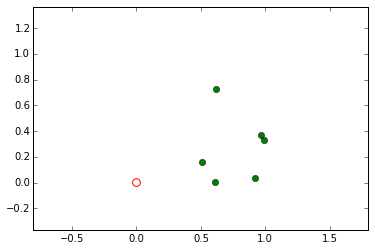

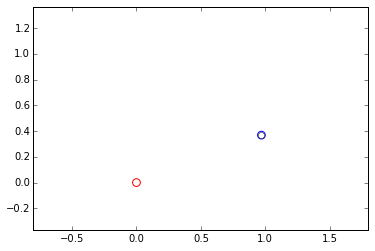

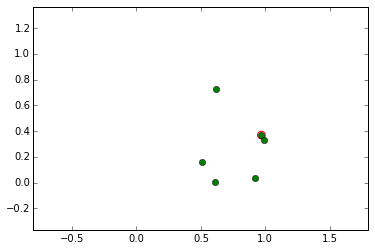

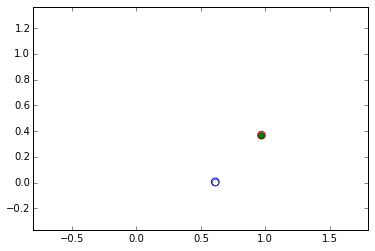

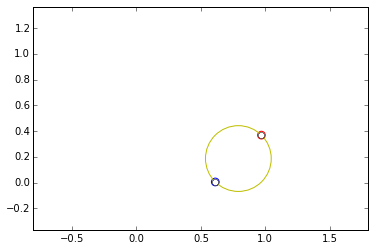

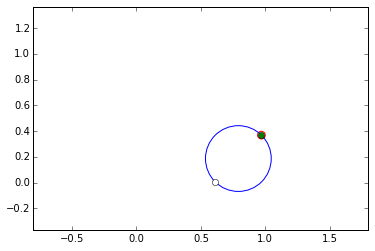

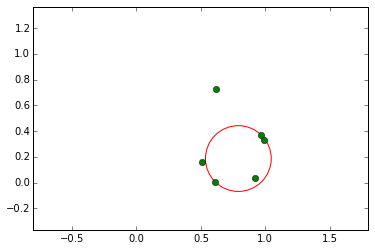

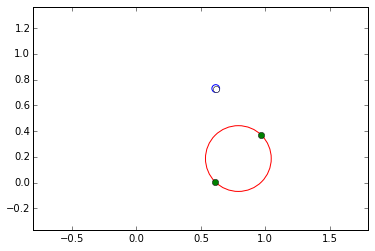

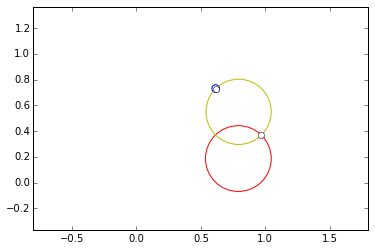

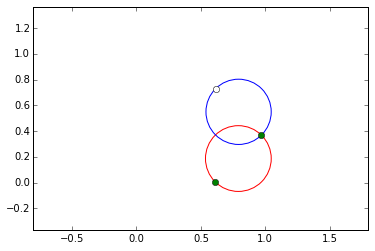

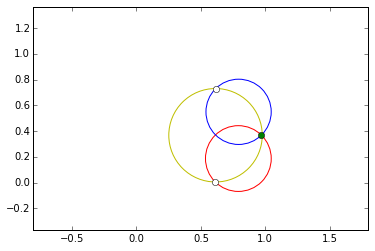

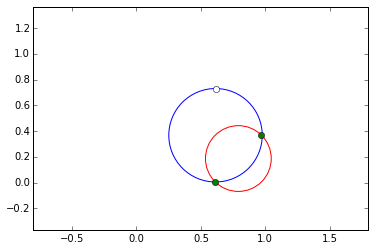

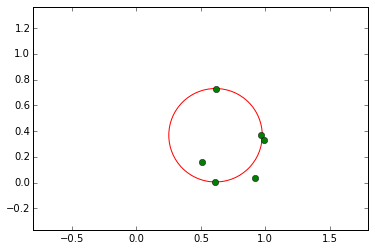

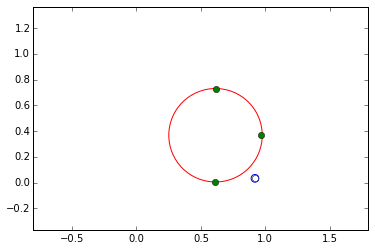

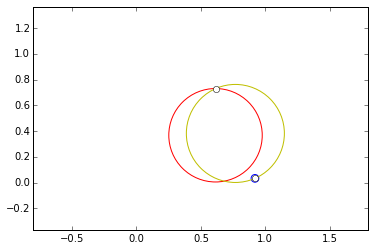

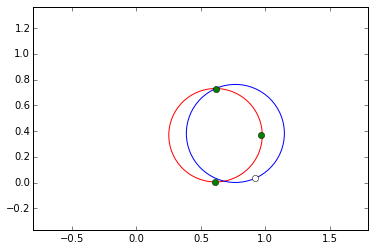

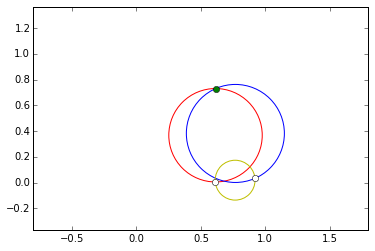

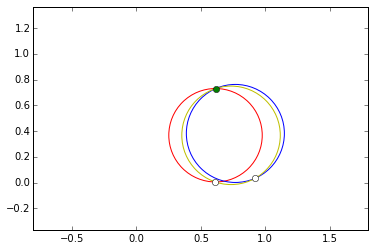

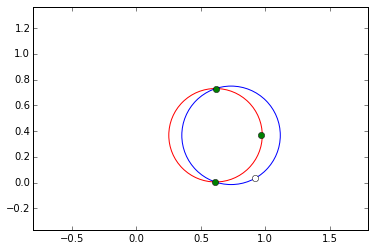

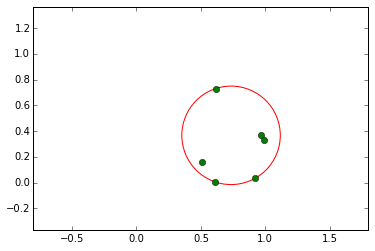

In [165]:
import random
def min_circle(pts, on_border, draw_c):
        if (len(on_border) == 3):
            return circle(on_border)
        
        cur = circle(on_border)
        
        draw(np.copy(pts), np.copy(on_border), list(draw_c) + list([cur]))
        
        random.shuffle(pts)
        
        for i in range(0, len(pts)):
            if (not cur.inside(pts[i])):
                cur = min_circle(list(pts[0:i]), list(on_border) + list([pts[i]]), list(draw_c) + list([cur]))
                draw(np.copy(pts), np.copy(on_border), list(draw_c) + list([cur]))
        return cur
answer = min_circle(list(points), [], [])    